In [1]:
#Importing libraries 
import numpy as np
#import pandas as pd
import nibabel as nib
import scipy as sp
import matplotlib.pyplot as plt
#import seaborn as sb
import nipy, os
%matplotlib inline 
os.chdir ("/Users/arashnazeri/Desktop/mri-python/")

In [2]:
#Loading Data & Reshaping
data=nib.load("func.nii.gz")
dims=data.shape
affine=data.get_affine()
data=data.get_data()
data=data.reshape(dims[0]*dims[1]*dims[2],dims[3])
rois=nib.load("rois.nii.gz").get_data()
rois=rois.reshape(dims[0]*dims[1]*dims[2],1)

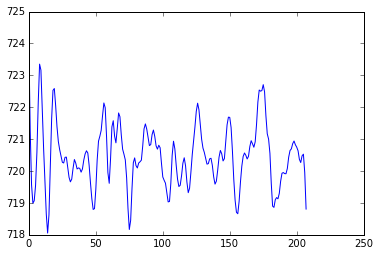

In [3]:
#Extracting time series
idx = np.where(rois==1)[0]
x = data[idx,:]
ts = np.mean(x,axis=0)
plt.plot(ts)

In [4]:
#Seed-based Correlation
output=np.zeros(dims[0]*dims[1]*dims[2])
for i in range(dims[0]*dims[1]*dims[2]):
    output[i]=np.corrcoef(ts,data[i,:])[1,0]
    
output[np.isnan(output)]=0

/Users/arashnazeri/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:1957: RuntimeWarning: invalid value encountered in true_divide
  return c / sqrt(multiply.outer(d, d))


In [5]:
#Reshape
final=output.reshape(dims[0],dims[1],dims[2])
mask=nib.load("mask.nii.gz").get_data()
masked=final*mask
ni_out=nib.nifti1.Nifti1Image(masked,affine)
ni_out.to_filename("seed_corr.nii.gz")

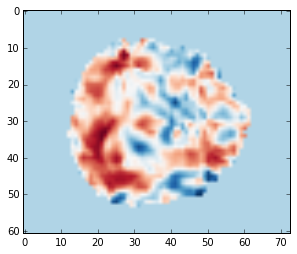

In [6]:
#Printing Output
plt.imshow(final[:,:,40]*mask[:,:,40],cmap=plt.cm.RdBu_r)


In [7]:
out_matrix=np.zeros((len(np.unique(rois))-1,dims[3]))

for roi in np.unique(rois):
    if roi > 0:
        idx = np.where(rois==roi)[0]
        x = data[idx,:]
        ts = np.mean(x,axis=0)
        ts=ts/np.std(ts);ts=ts-np.mean(ts)        
        out_matrix[roi-1,:]=ts


/Users/arashnazeri/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


<function matplotlib.pyplot.show>

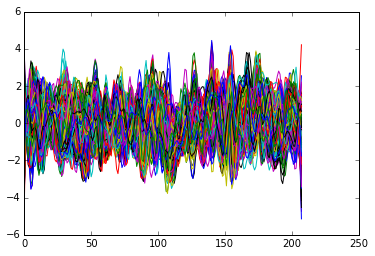

In [8]:
plt.plot(out_matrix.T,)
plt.show

<matplotlib.colorbar.Colorbar instance at 0x109574cf8>

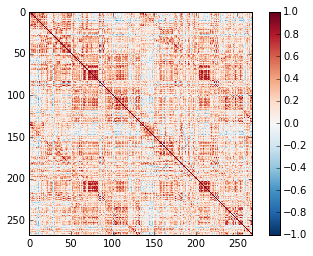

In [9]:
G=np.corrcoef(out_matrix)
plt.imshow(G,interpolation='nearest',cmap=plt.cm.RdBu_r,vmin=-1,vmax=1)
plt.colorbar()